# Connecticut Real Estate 2011-2021
### Aaron 'Asa' Sherwyn
# 07 Time Series Analysis
1. Imports and Set-up
1. Subsetting, wrangling, and cleaning
1. Decomposition
1. Stationarity Test
1. Stationarizing Data
1. Exports

## 1. Imports and Set-up

In [1]:
#loading libraries

import quandl
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#Creating a path to the root directory for this project

path = r'C:\Users\theva\OneDrive\CareerFoundry\Data Immersion\A6\Connecticut Real Estate 2001-2020'

In [3]:
#Importing main dataframe

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'CTRE 2011-2021 CLUSTERED.pkl'))

In [4]:
# Display modifications

pd.set_option('display.max_rows', 200) #Increasing display limit

warnings.filterwarnings("ignore") #Disable deprecation warnings

plt.style.use('fivethirtyeight') #FiveThirtyEight.com plotting style

#Ensuring graphs are displayed within the notebook without "call"ing first
%matplotlib inline

rcParams['figure.figsize'] = 18, 7 # This will define a fixed size for all special charts.

### Checking dataframe

In [5]:
#Checking df

df.head(20)

,serial_number,list_year,town,assessed_value,sale_amount,sales_ratio,residential_type,in_pandemic,month,year,...,street_suffix,population,latitude,longitude,price_index,norm_assessed_value,norm_sale_amount,norm_sales_ratio,sale_category,ratio_category
1,20002,2020,Ashford,253000,430000.0,0.588300,Single Family,1,10,2020,...,ROAD,4193,41.8731,-72.1216,254.076,99576.50,169240.70,0.588372,Low range,Average ratio
2,200212,2020,Avon,130400,179900.0,0.724800,Condo,1,3,2021,...,DRIVE,18821,41.8096,-72.8305,258.935,50360.13,69476.90,0.724847,Low range,Average ratio
3,200243,2020,Avon,619290,890000.0,0.695800,Single Family,1,4,2021,...,DRIVE,18821,41.8096,-72.8305,261.237,237060.60,340686.81,0.695831,Mid range,Average ratio
4,200377,2020,Avon,862330,1447500.0,0.595700,Single Family,1,7,2021,...,DRIVE,18821,41.8096,-72.8305,267.789,322018.45,540537.51,0.595737,Mid range,Average ratio
5,200109,2020,Avon,847520,1250000.0,0.678000,Single Family,1,12,2020,...,DRIVE,18821,41.8096,-72.8305,254.081,333562.92,491969.10,0.678016,Mid range,Average ratio
6,2020313,2020,Berlin,412000,677500.0,0.608100,Single Family,1,7,2021,...,ROAD,20107,41.6215,-72.7457,267.789,153852.47,252997.70,0.608118,Mid range,Average ratio
8,20139,2020,Bethel,171360,335000.0,0.511500,Single Family,1,12,2020,...,DRIVE,20287,41.3712,-73.4140,254.081,67443.06,131847.72,0.511522,Low range,Average ratio
9,200086,2020,Bethlehem,168900,352000.0,0.479800,Single Family,1,8,2021,...,ROAD,3408,41.6404,-73.2058,268.387,62931.51,131153.89,0.479830,Low range,Low ratio
10,2000381,2020,Bloomfield,163730,250000.0,0.654900,Condo,1,9,2021,...,RIDGE,21399,41.8265,-72.7301,269.086,60846.72,92907.10,0.654920,Low range,Average ratio
11,200258,2020,Branford,530500,700000.0,0.757800,Single Family,1,1,2021,...,NaN,28230,41.2799,-72.8141,255.296,207798.01,274191.53,0.757857,Mid range,Average ratio


In [6]:
#Checking df

df.tail(20)

,serial_number,list_year,town,assessed_value,sale_amount,sales_ratio,residential_type,in_pandemic,month,year,...,street_suffix,population,latitude,longitude,price_index,norm_assessed_value,norm_sale_amount,norm_sales_ratio,sale_category,ratio_category
435159,100012,2010,Woodbridge,284900,415000.0,0.686506,Single Family,0,10,2010,...,ROAD,9073,41.3526,-73.0084,214.623,132744.39,193362.31,0.686506,Low range,Average ratio
435160,10155,2010,Milford,269100,310000.0,0.868065,Condo,0,12,2010,...,ROAD,52308,41.2307,-73.0640,215.262,125010.45,144010.55,0.868065,Low range,High ratio
435161,100027,2010,Branford,111100,139000.0,0.799281,Condo,0,11,2010,...,NaN,28230,41.2799,-72.8141,214.750,51734.58,64726.43,0.799281,Low range,Average ratio
435162,100117,2010,Newington,65310,97000.0,0.673299,Condo,0,10,2010,...,DRIVE,30493,41.6973,-72.7228,214.623,30430.10,45195.53,0.673299,Low range,Average ratio
435163,10146,2010,Bloomfield,358470,560000.0,0.640125,Single Family,0,6,2011,...,LANE,21399,41.8265,-72.7301,222.522,161094.18,251660.51,0.640125,Mid range,Average ratio
435164,10212,2010,Hamden,181160,207500.0,0.873060,Single Family,0,3,2011,...,CIRCLE,61160,41.3839,-72.9026,220.024,82336.47,94307.89,0.873060,Low range,High ratio
435165,10055,2010,North Haven,168980,190000.0,0.889368,Single Family,0,12,2010,...,ROAD,24217,41.3903,-72.8595,215.262,78499.69,88264.53,0.889368,Low range,High ratio
435166,100846,2010,Stamford,738830,687500.0,1.074662,Single Family,0,6,2011,...,ROAD,134820,41.0534,-73.5387,222.522,332025.60,308958.22,1.074662,Mid range,High ratio
435167,10088,2010,Groton,114240,128000.0,0.892500,Single Family,0,12,2010,...,COURT,38686,41.3497,-72.0791,215.262,53070.21,59462.42,0.892500,Low range,High ratio
435168,10076,2010,Brookfield,349480,439000.0,0.796082,Single Family,0,3,2011,...,ROAD,17428,41.4826,-73.4096,220.024,158837.22,199523.69,0.796082,Low range,Average ratio


In [7]:
#Checking df

df.shape

(430492, 21)

Check!

## Data Prep

In [8]:
#making subset of sale_amount and date variables

df_sub = df[['sale_amount', 'month', 'year']]

In [9]:
#checking df_sub

df_sub.head()

,sale_amount,month,year
1,430000.0,10,2020
2,179900.0,3,2021
3,890000.0,4,2021
4,1447500.0,7,2021
5,1250000.0,12,2020


In [10]:
#checking df_sub

df_sub.shape

(430492, 3)

In [11]:
#Making date variable

df_sub['day'] = 1 #Making a day of 1 for each entry
df_sub['date'] = pd.to_datetime(df_sub[['year', 'month', 'day']]) #creating a datetime variable

In [12]:
#Grouping by date and sum sale_amount

df_grp = pd.DataFrame(df_sub.groupby('date')['sale_amount'].sum(), columns = ['sale_amount'])

In [13]:
#checking df_grp

df_grp.shape

(135, 1)

In [14]:
#Checking for misdated entries

df_grp.sort_values('sale_amount').apply(lambda s: s.apply('{0:.2f}'.format))

,sale_amount
date,
2010-07-01,140000.00
2010-08-01,215000.00
2010-05-01,4250000.00
2011-02-01,438837185.00
2012-02-01,444741837.00
2013-02-01,469734586.00
2014-02-01,500222401.00
2011-01-01,513582919.00
2012-01-01,521779815.00


In [15]:
#Dropping misdated values

df_grp = df_grp.loc[df_grp['sale_amount'] > 5000000]

In [16]:
#checking df_grp

df_grp.shape

(132, 1)

>Notes: This data subset was selected to look at the change of sales_amount over time. It was groupped into month intervals to help reduce noise and smooth the data.

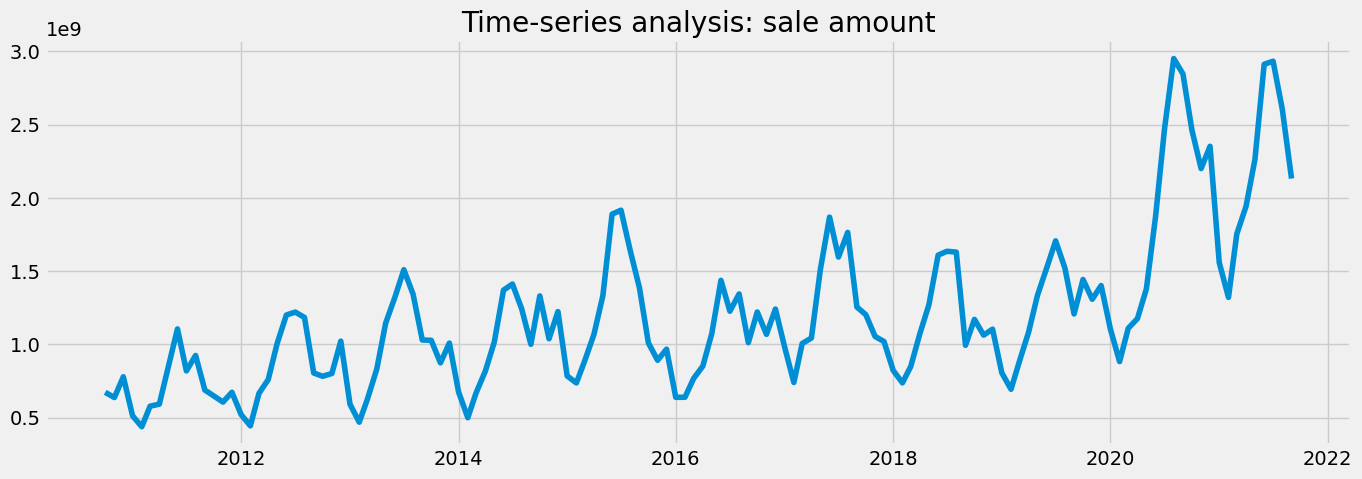

In [19]:
#Plotting df_grp

plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df_grp)
plt.title('Time-series analysis: sale amount')
plt.savefig('time_series_sale_amount.png')
plt.show()

In [20]:
#Checking for missing values

df_grp.isnull().sum()

sale_amount    0
dtype: int64

In [21]:
#Checking for duplicates

dups = df_grp.duplicated()
dups.sum()

0

## 3. Decomposition

In [22]:
#Decomposing time series with an additivie model

decomp = sm.tsa.seasonal_decompose(df_grp, model = 'additive')

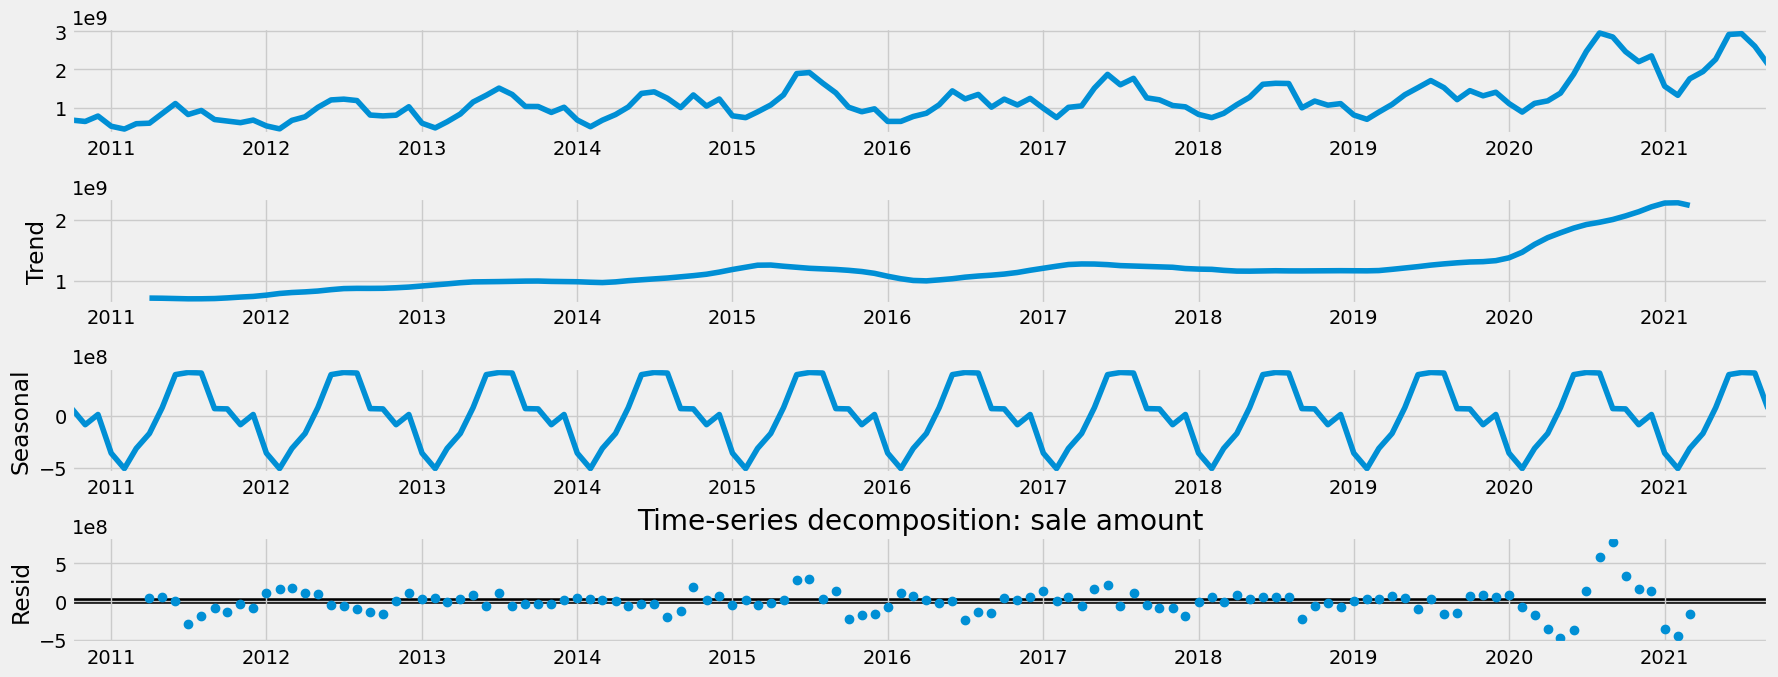

In [23]:
#Plotting decomposition

decomp.plot()
plt.title('Time-series decomposition: sale amount')
plt.savefig('time_series_decomp_sale_amount.png')
plt.show()

## 4. Stationarity Test

In [24]:
#Performing Dickey-Fuller test

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

#applying dickey_fuller function
dickey_fuller(df_grp['sale_amount'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.631997
p-value                          0.863587
Number of Lags Used             13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


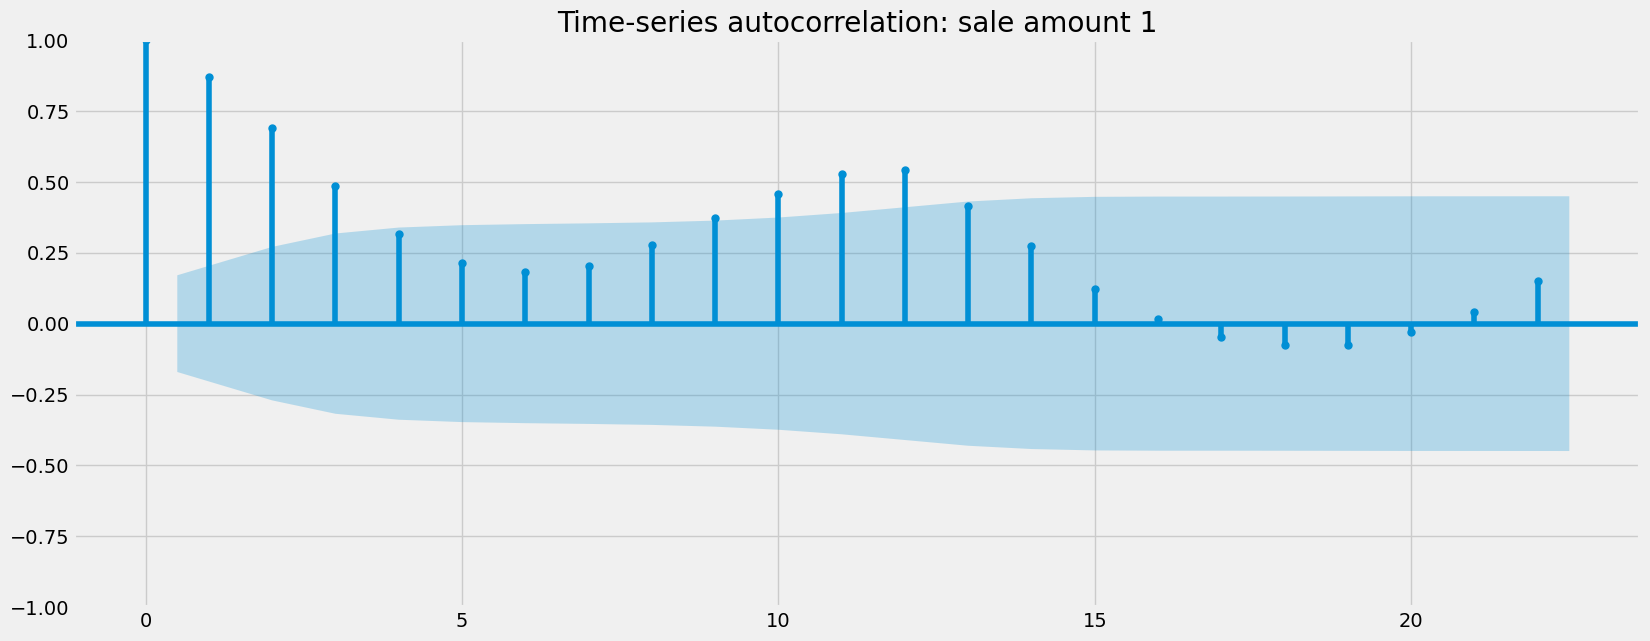

In [25]:
#Checking autocorrelation plot

plot_acf(df_grp)
plt.title('Time-series autocorrelation: sale amount 1')
plt.savefig('time_series_autocor_sale_amount1.png')
plt.show()

>Notes: Decomposition plots indicate an upward trend. Dickey-Fuller test confirms non-stationarity with a t-stat of -0.63 and a 5% crit. value of -2.89. Autocorrelation is just within acceptable range, but could use some improvement.

## 5. Stationarizing Data

In [26]:
#Differencing data

df_diff = df_grp - df_grp.shift(1)
df_diff.dropna(inplace = True)
df_diff.shape

(131, 1)

In [27]:
#Checking differenced data

df_diff.head(20)

,sale_amount
date,
2010-11-01,-35438537.0
2010-12-01,141406012.0
2011-01-01,-265938727.0
2011-02-01,-74745734.0
2011-03-01,140087904.0
2011-04-01,13864555.0
2011-05-01,251168456.0
2011-06-01,262119488.0
2011-07-01,-286381402.0


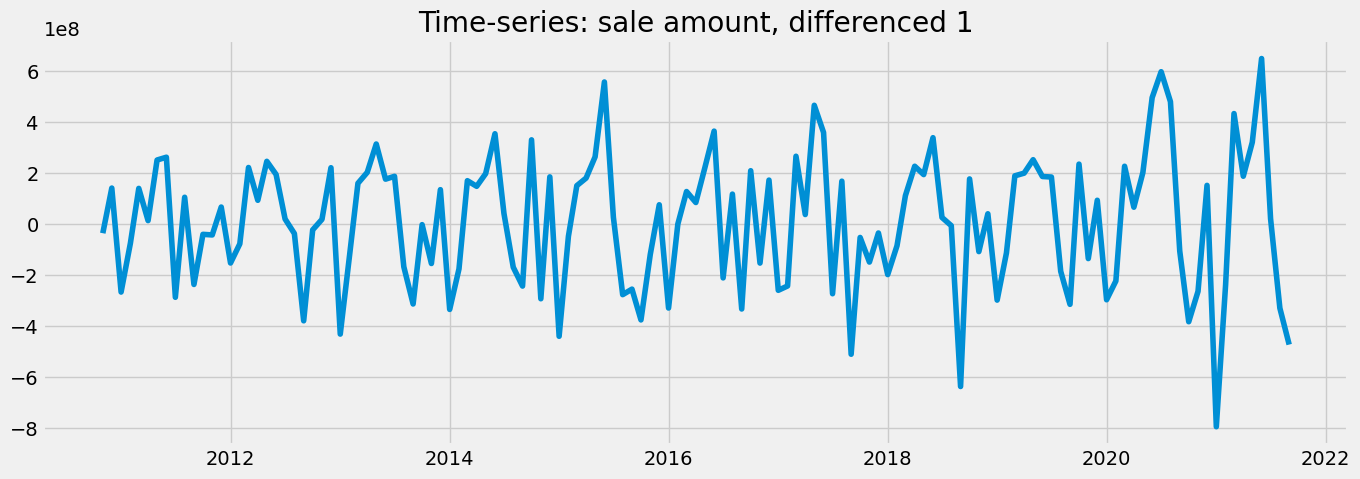

In [28]:
#Plotting df_diff

plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df_diff)
plt.title('Time-series: sale amount, differenced 1')
plt.savefig('time_series_sale_amount_diff1.png')
plt.show()

In [29]:
#reapplying Dickey-Fuller Test

dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.500435
p-value                          0.007976
Number of Lags Used             12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


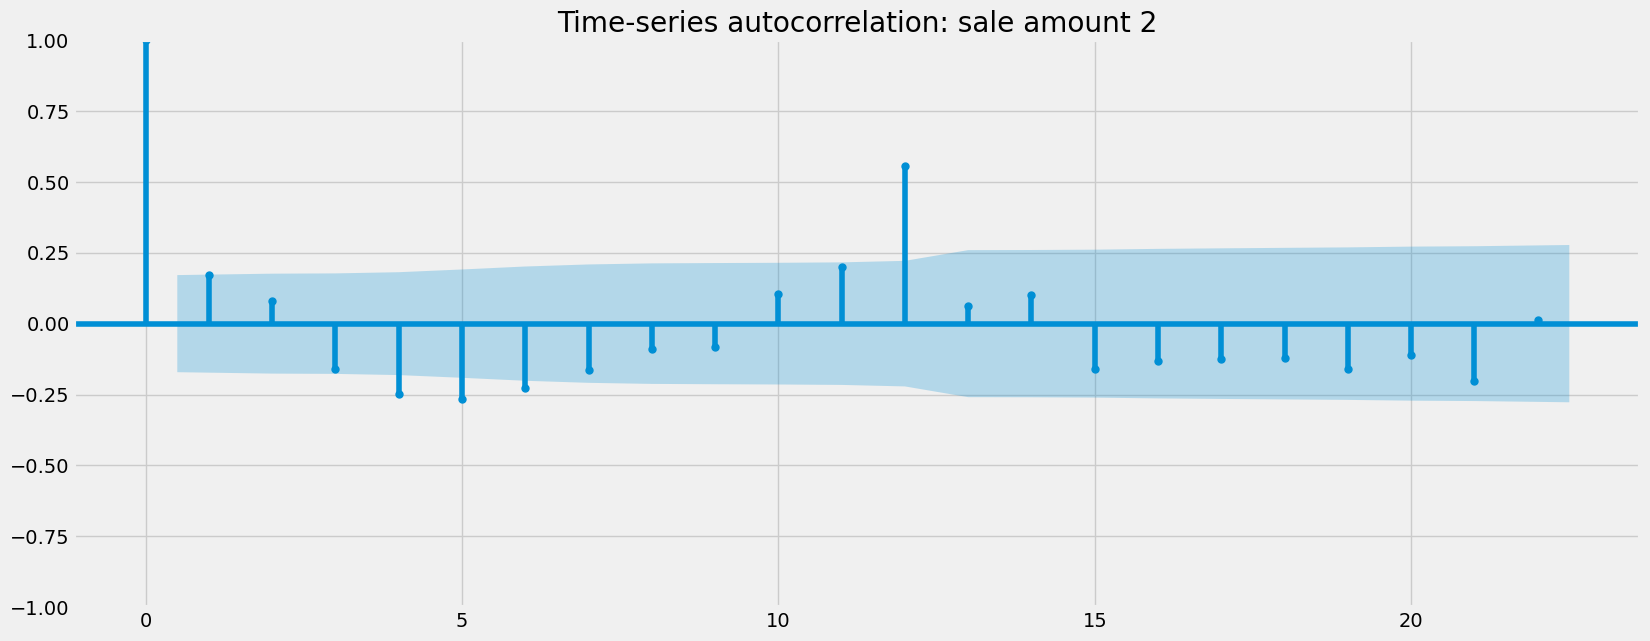

In [30]:
#rechecking autocorrelation

plot_acf(df_diff)
plt.title('Time-series autocorrelation: sale amount 2')
plt.savefig('time_series_autocor_sale_amount2.png')
plt.show()

>Notes: Now with a t-stat of -3.5 below the 1% crit. value of -3.48 and a more mild autocorrelation plot, the data can be said to be non-stationary.

## 6. Exports

In [31]:
#exporting differenced data

df_diff.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'CTRE 2011-2021 DIFFERENCED SALE AMOUNT.csv'))